<a href="https://www.kaggle.com/code/victorespuna/stroke-classification?scriptVersionId=102275618" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import seaborn as sns 
import plotly as px
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# DATA VISUALISATION

In [4]:
print('This dataset has', df.shape[0], 'rows and', df.shape[1], 'columns')

This dataset has 5110 rows and 12 columns


In [5]:
print('The Dataset contains', df.isna().sum().sum(), 'missing values and', df.duplicated().sum().sum(), 'duplicated values')

The Dataset contains 201 missing values and 0 duplicated values


We look at the proportion for missing values among the toa

In [6]:
df.isnull().sum()/df.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Only 4% of missing values -> Don't drop, imputation will be used. We replace the missing values by the mean. Before, we create a copy for the DataViz

In [7]:
dv = df.copy()
for i in df.columns[df.isnull().any(axis=0)]:     
    df[i].fillna(df[i].mean(),inplace=True)

We look at the values composing the different columns

In [8]:
df.nunique(axis=0)

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [9]:
df.gender.unique()
df.smoking_status.unique()
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

- 3 genders : Male, Female, Other
- 4 smoking status : Formerly smoked, never smoked, smokes, Unknown 
- 4 work type : Never_worked, Children, Govt_job, Self-employed, Private

*We begin the Visualisation with plot*

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
dv.dropna(inplace = True)

Correlation study of numerical variables 

<AxesSubplot:>

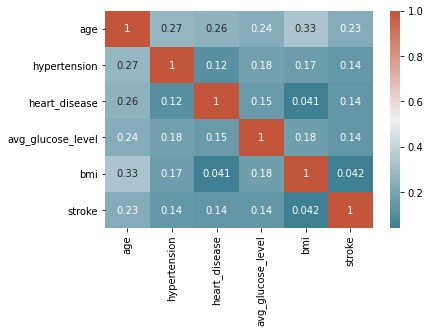

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 

corre = dv.select_dtypes(include=['int64','float64']).drop('id', axis = 1).corr()
sns.heatmap(corre, xticklabels = corre.columns, yticklabels = corre.columns, annot = True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Important Correlation with Stroked State:
- Age 
- Hypertension, heart_disease, avg_glucose_level

bmi doesn't involve in the process*

<AxesSubplot:xlabel='age', ylabel='Count'>

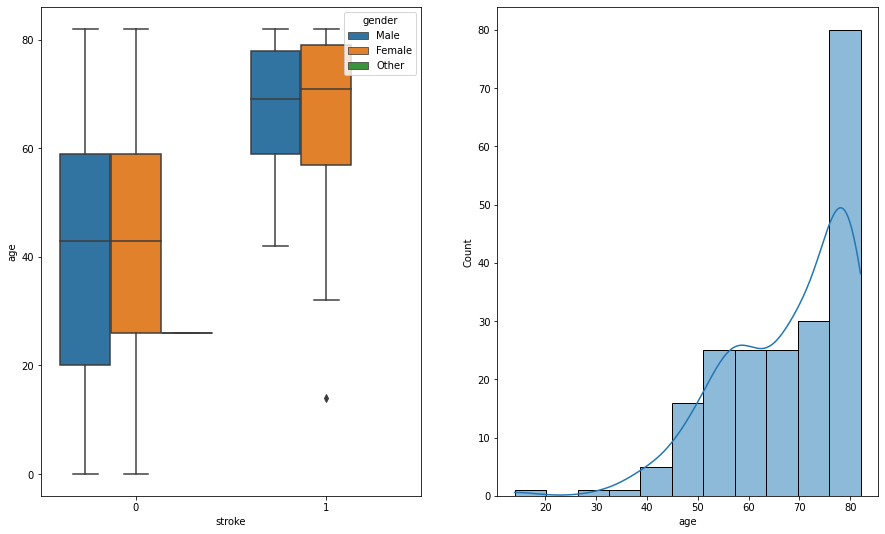

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15,9))
sns.boxplot(x='stroke', y='age', data=dv, hue = 'gender', ax=axes[0])
sns.histplot((dv[dv['stroke']==1])['age'], kde = True, ax=axes[1])




Several informations :
- Age for people who stroked : Between 37 and 82 years old . 1 outliers -> 17-18 years old

One outlier on age of people stoked. We are going to delete it

In [14]:
def drop_outliers(df, column):
    iqr = 1.5*(np.percentile(df[column],75)-np.percentile(df[column],25))
    max_out, min_out = iqr + np.percentile(df[column], 75), np.percentile(df[column], 25) - iqr
    df = df[df[column]> min_out]
    df = df[df[column]< max_out]
drop_outliers(dv, 'age')



<AxesSubplot:xlabel='age', ylabel='Count'>

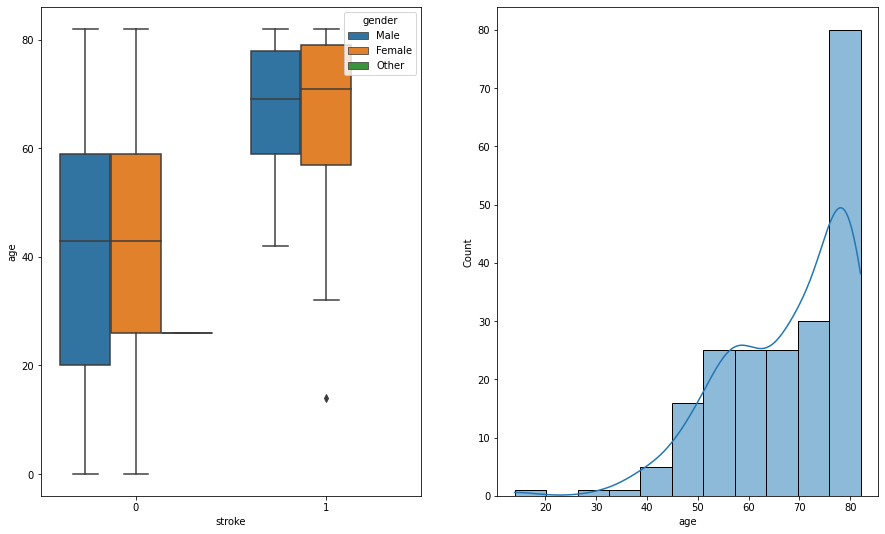

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15,9))
sns.boxplot(x='stroke', y='age', data=dv, hue = 'gender', ax=axes[0])
sns.histplot((dv[dv['stroke']==1])['age'], kde = True, ax=axes[1])

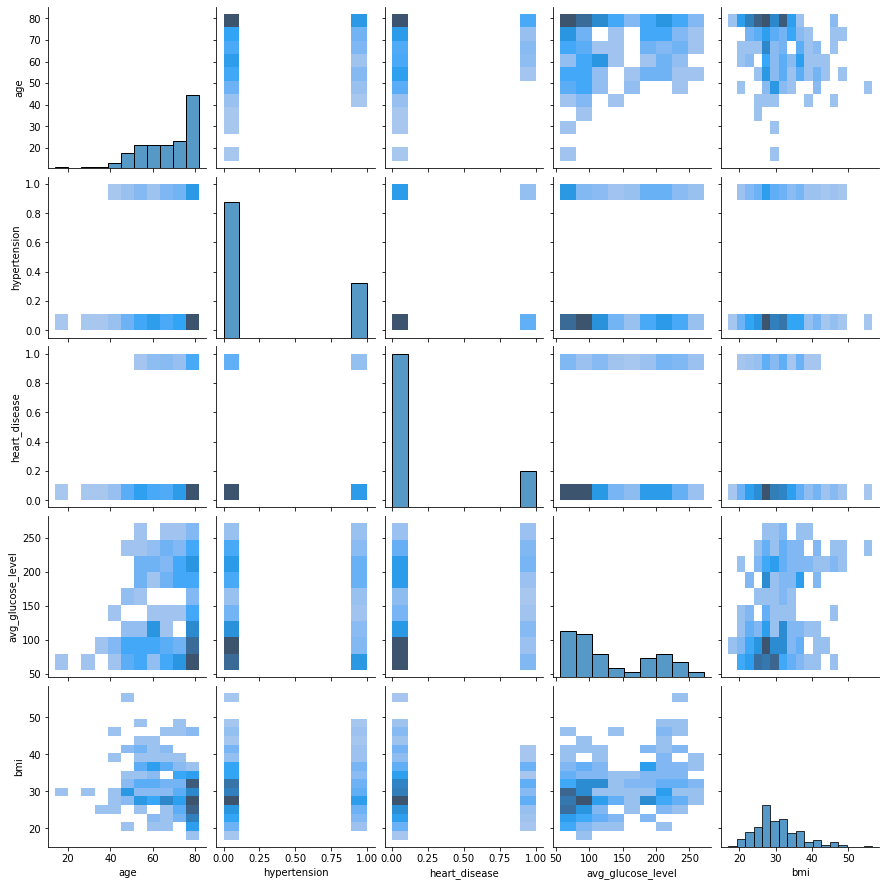

In [16]:
sns.pairplot(dv[dv['stroke']==1].drop(['id', 'stroke'], axis = 1), kind='hist')

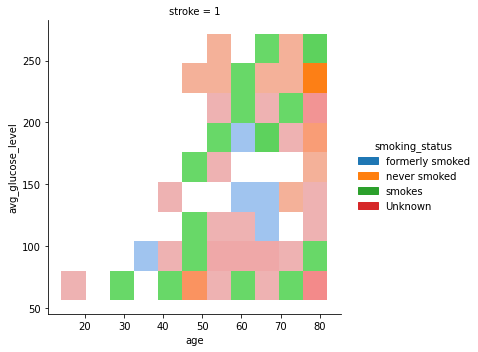

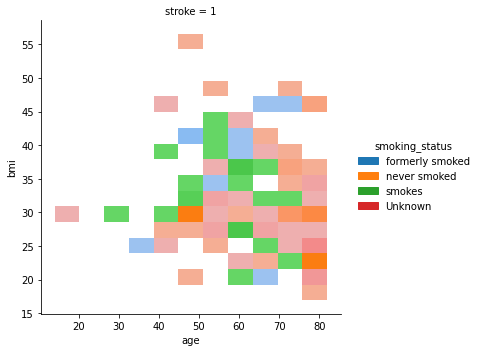

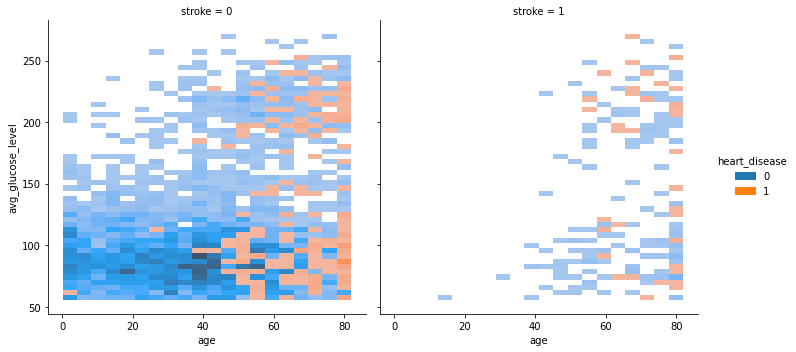

In [17]:
sns.displot(x='age' , y='avg_glucose_level', data = dv[dv['stroke'] == 1],  col='stroke', hue='smoking_status')
sns.displot(x='age' , y='bmi', data = dv[dv['stroke'] == 1],  col='stroke', hue='smoking_status')
sns.displot(x='age' , y='avg_glucose_level', data = dv,  col='stroke', hue='heart_disease')




<AxesSubplot:xlabel='gender', ylabel='Count'>

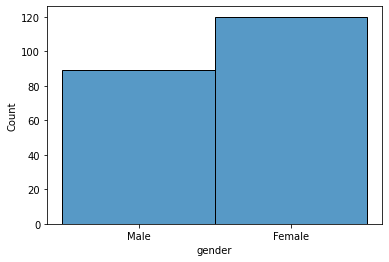

In [18]:
sns.histplot(x='gender' , data = dv[dv['stroke']==1]) 

Several informations :
- Age for people who stroked : Between 37 and 82 years old . 1 outliers -> 17-18 years old
- Bmi from people who stroked : Between 18 and 57. Not useful because interval is almost same for non stroke. That's why there is a low correlation between Bmi and Stroke indicator

**We begin handling with missing values in order to use SKlearn Model**

In [19]:
df2 = df.copy()

for i in df2.columns[df2.isnull().any(axis=0)]:     
    df2[i].fillna(df2[i].mean(),inplace=True)

# Machine Learning Model

We separate the X and y dataset, and create the train and test dataset

In [20]:
df.head()
dml = df.copy()


In [21]:
dml.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [22]:
dml.drop('id', axis=1, inplace =True)

In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dml, test_size = 0.2, shuffle = True, random_state = 0)

In [24]:
model_features = dml.columns.drop('stroke')
model_target = 'stroke'
X_train, y_train = train_data[model_features], train_data[model_target]
X_test, y_test = test_data[model_features], test_data[model_target]

In [25]:
num_features = list(X_train.columns[X_train.dtypes == 'float64']) + list(X_train.columns[X_train.dtypes == 'int64'])
cat_features = list(X_train.columns[X_train.dtypes == 'object'])

In [26]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy = 'mean')),
    ('num_scaler', MinMaxScaler())
])

cat_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown = 'ignore'))
])
    
data_processor = ColumnTransformer([
    ('numerical_processing', num_processor, num_features),
    ('categorical_processing', cat_processor, cat_features)
])



In [27]:
from sklearn import set_config
set_config(display = 'None')
data_processor

ColumnTransformer(transformers=[('numerical_processing',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('num_scaler',
                                                  MinMaxScaler())]),
                                 ['age', 'avg_glucose_level', 'bmi',
                                  'hypertension', 'heart_disease']),
                                ('categorical_processing',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('data_processing', data_processor),
    ('rf', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi', 'hypertension',
                                                   'heart_disease']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  

In [29]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

train_predict = pipeline.predict(X_train)

print(confusion_matrix(y_train, train_predict))
print(classification_report(y_train, train_predict))
print('Train accuracy', accuracy_score(y_train, train_predict))

[[3893    0]
 [   0  195]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3893
           1       1.00      1.00      1.00       195

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088

Train accuracy 1.0


In [30]:
test_predict = pipeline.predict(X_test)

print(confusion_matrix(y_test, test_predict))
print(classification_report(y_test, test_predict))
print('Test accuracy', accuracy_score(y_test, test_predict))

[[967   1]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.50      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022

Test accuracy 0.9471624266144814


In [31]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
              'rf__n_estimators' : np.arange(1,6)
}

grid_search = GridSearchCV(pipeline,
                          param_grid,
                          cv=10,
                          verbose=10,
                          n_jobs=1
                          )

In [32]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10; 1/5] START rf__n_estimators=1.........................................
[CV 1/10; 1/5] END .......................rf__n_estimators=1; total time=   0.0s
[CV 2/10; 1/5] START rf__n_estimators=1.........................................
[CV 2/10; 1/5] END .......................rf__n_estimators=1; total time=   0.0s
[CV 3/10; 1/5] START rf__n_estimators=1.........................................
[CV 3/10; 1/5] END .......................rf__n_estimators=1; total time=   0.0s
[CV 4/10; 1/5] START rf__n_estimators=1.........................................
[CV 4/10; 1/5] END .......................rf__n_estimators=1; total time=   0.0s
[CV 5/10; 1/5] START rf__n_estimators=1.........................................
[CV 5/10; 1/5] END .......................rf__n_estimators=1; total time=   0.0s
[CV 6/10; 1/5] START rf__n_estimators=1.........................................
[CV 6/10; 1/5] END .......................rf__n_

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('data_processing',
                                        ColumnTransformer(transformers=[('numerical_processing',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('num_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'avg_glucose_level',
                                                                          'bmi',
                                                                          'hypertension',
                                                   

In [33]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'rf__n_estimators': 4}
0.9452041085382807


In [34]:
classifier = grid_search.best_estimator_
classifier.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi', 'hypertension',
                                                   'heart_disease']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.50      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.72      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022

Test accuracy 0.9471624266144814


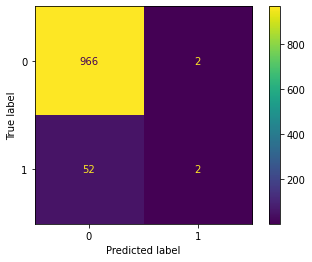

In [35]:
from sklearn.metrics import plot_confusion_matrix

test_predict = classifier.predict(X_test)

plot_confusion_matrix(classifier, y_true = y_test,X = X_test)
print(classification_report(y_test, test_predict))
print('Test accuracy', accuracy_score(y_test, test_predict))